In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy
%matplotlib inline
plt.rcParams['figure.figsize']=(12,3)

from EM_utils import *

In [2]:
# example of how to use EM utils library

In [3]:
# getting points from two different clusters 
# and merging them into one unlabeled cluster

# random mean (mu) and std (sigma)
x1 = np.random.normal(size = 50, loc = -1, scale = 0.4)
x2 = np.random.normal(size = 50, loc = 2, scale = 0.2) # loc - mean, var - std
#x1 ~ Norm(0, 0.04)
#x2 ~ Norm(2, 0.01)
x = np.concatenate((x1,x2))


mu1 = np.random.rand(1) 
mu2 = np.random.rand(1)
sigma1 = sigma2 = 0.2

u = np.array([mu1, mu2])
u_old = u[0]
sigma = np.array([sigma1, sigma2])
pi = np.array([0.5, 0.5])


 Iterration  0
E-step: assigned responsibilities
log-likelihood=  [-2280.31501159]


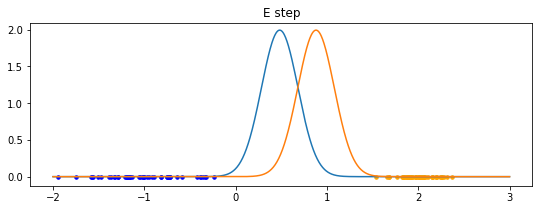

M-step: changed Gaussians


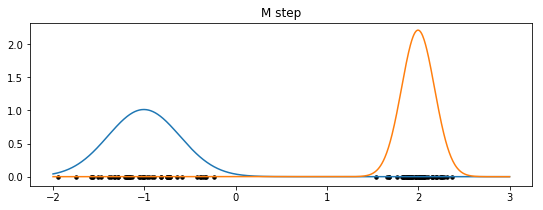

No handles with labels found to put in legend.


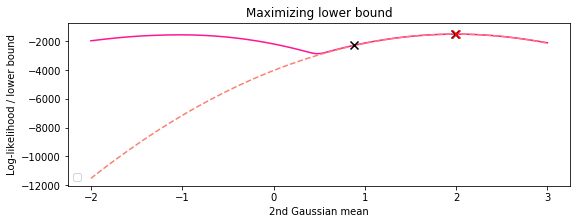


 Iterration  1
E-step: assigned responsibilities
log-likelihood=  -78.81839327089682


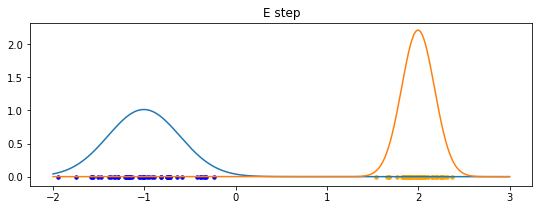

M-step: changed Gaussians


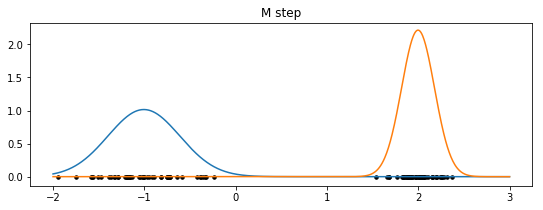

No handles with labels found to put in legend.


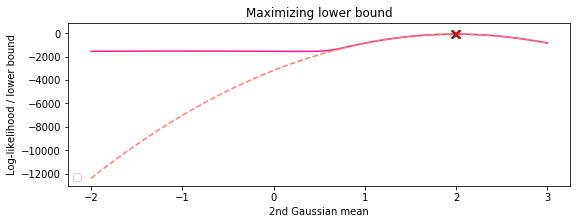


 Iterration  2
E-step: assigned responsibilities
log-likelihood=  -78.81837793215611


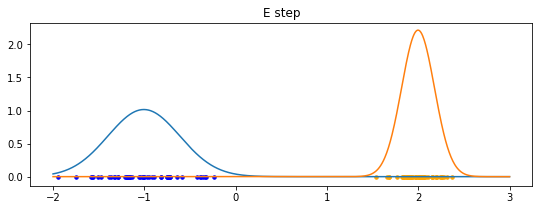

M-step: changed Gaussians


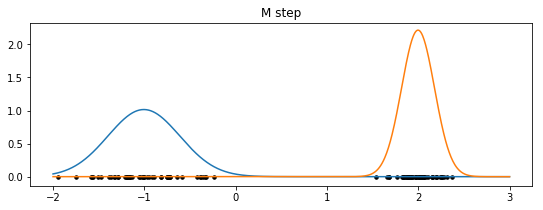

No handles with labels found to put in legend.


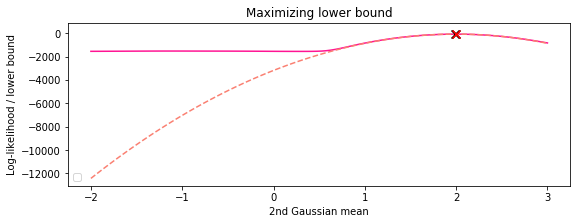


 Iterration  3
E-step: assigned responsibilities
log-likelihood=  -78.81837793215617


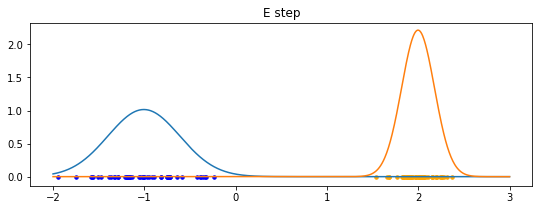

M-step: changed Gaussians


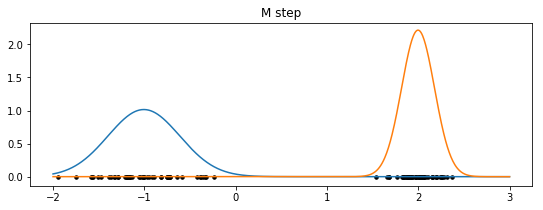

No handles with labels found to put in legend.


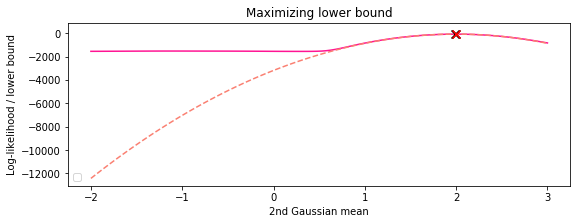


 Iterration  4
E-step: assigned responsibilities
log-likelihood=  -78.81837793215617


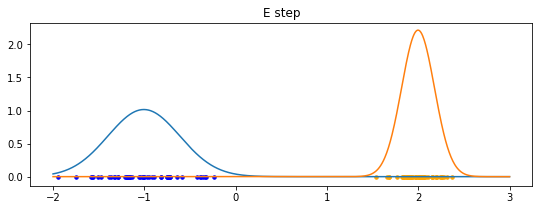

M-step: changed Gaussians


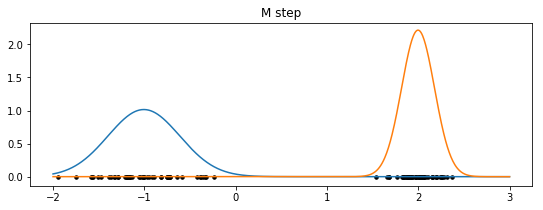

No handles with labels found to put in legend.


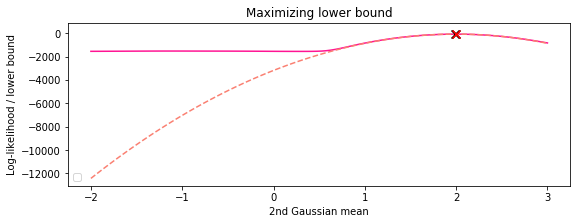


 Iterration  5
E-step: assigned responsibilities
log-likelihood=  -78.81837793215617


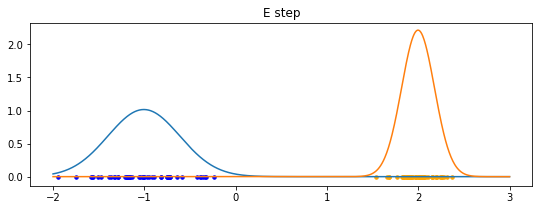

M-step: changed Gaussians


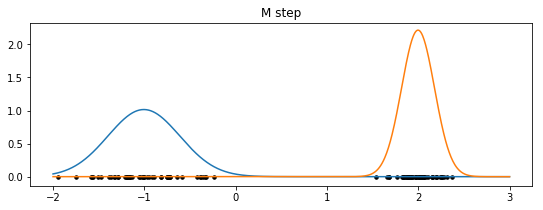

No handles with labels found to put in legend.


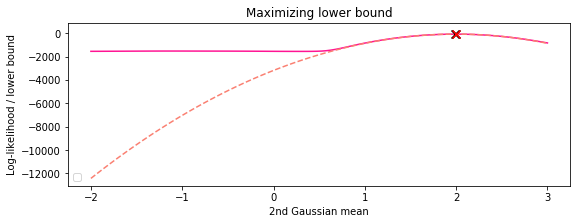


 Iterration  6
E-step: assigned responsibilities
log-likelihood=  -78.81837793215617


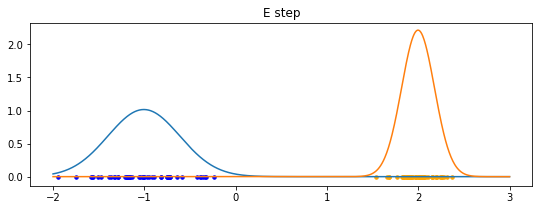

M-step: changed Gaussians


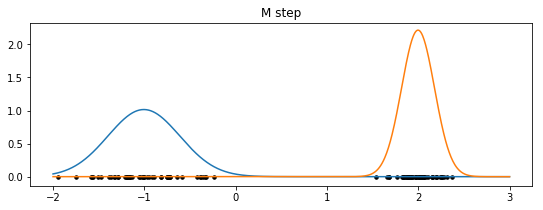

No handles with labels found to put in legend.


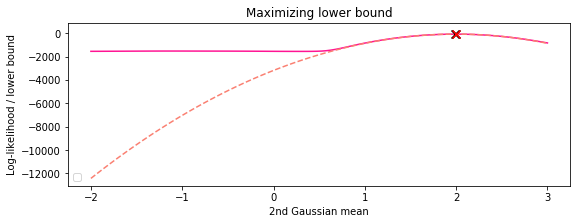

In [4]:
for i in range(7):
    print("\n Iterration ", i)
    
    if (i>0):
        responsibilities_old = responsibilities
    
    responsibilities = E_step(x, pi, u, sigma)
    log_l = get_log_likelihood(x, u, sigma, pi)
    print("E-step: assigned responsibilities")
    print('log-likelihood= ',log_l)
    plot_pdf(u, sigma)
    plot_points(x, responsibilities)
    plt.title('E step')
    plt.show()
    
    u_old = u
    sigma_old = sigma
    pi_old = pi
    
    pi, u, sigma = M_step(x, responsibilities)
    print("M-step: changed Gaussians")
    plot_pdf(u, sigma)
    plot_points(x)
    plt.title('M step')
    plt.show()
    
    mu = np.linspace(-2, 3, 100)
    plt.plot(mu, get_log_likelihood(x, np.array((u_old[0], mu)), sigma_old, pi_old), color='deeppink')
    # plot lower bound estimate with old parameter values, u2 is varied
    plt.plot(mu, get_lower_bound(x, np.array((u_old[0], mu)), sigma_old, pi_old, responsibilities), '--', color='salmon')
    
    # now let's look at how our parameters have been updated
    lower_bound = get_lower_bound(x, np.array((u_old[0], mu)), sigma_old, pi_old, responsibilities)
    
    # u2_max = u2 value that maximizes lower bound
    mu_max = mu[ np.argmax(lower_bound) ]
    # log-likelihood value at u2_max
    max_l = get_log_likelihood(x, np.array((u_old[0], mu_max)), sigma_old, pi_old)

    # log-likelihood value with old parameters 
    old_l = get_log_likelihood(x, np.array((u_old[0], u_old[1])), sigma_old, pi_old)

    # log-likelihood value with new parameters 
    new_l = get_log_likelihood(x, np.array((u_old[0], u[1])), sigma_old, pi_old)

    plt.scatter(u_old[1], old_l, color='black', marker='x', s=64, zorder=10)
    plt.scatter(mu_max, max_l, color='black', marker='x', s=64, zorder=10)
    plt.scatter(u[1], new_l, color='red', marker='x', s=64, zorder=10)

    plt.ylabel('Log-likelihood / lower bound')
    plt.xlabel('2nd Gaussian mean')
    plt.legend(loc='lower left')
    plt.title('Maximizing lower bound')
    plt.show()